***
# TP6 : Support vector machine

***

## Bibliothèque

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import cvxopt

## 1. Plan séparateur

In [44]:
X = np.array([[0, 2, 2, 3],[0, 2, 0, 0]]).T
y = np.array([-1, -1, 1, 1]).T

In [45]:
def aff_donnees(X,y,bornex,borney,s): 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='winter');
    plt.xlim(bornex); 
    plt.ylim(borney);
    plt.grid();

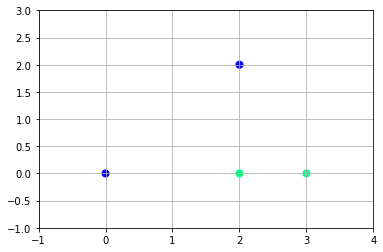

In [46]:
bornex = (np.min(X[:,0])- 1, np.max(X[:,0]+ 1))
borney = (np.min(X[:,1])- 1, np.max(X[:,1]+ 1))
aff_donnees(X, y, bornex, borney, 50)

In [47]:
def aff_plan(w,b, bornex):
    x = np.linspace(bornex[0], bornex[1], 10)
    y= (-w[0]*x - b)/w[1]

    plt.plot(x, y)


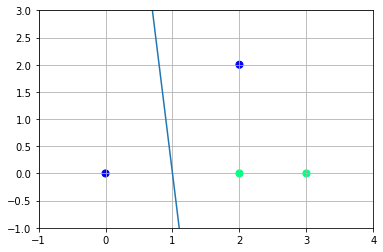

In [48]:
w= np.array([1, 0.1]).T
b = -1
aff_plan(w, b, bornex)
aff_donnees(X, y, bornex, borney, 50)

## 2. SVM linéaire dans le primal

In [49]:
def Resoud_primal(X,y):
    n= X.shape[1]
    N= X.shape[0]
    q = np.zeros((n+1))
    q = cvxopt.matrix(q) 

    P1=np.concatenate((np.zeros((1,1)),np.zeros((1,n))),axis=1) 
    P2=np.concatenate((np.zeros((n,1)),np.eye(n)),axis=1) 
    P=np.concatenate((P1,P2),axis=0) 
    P=cvxopt.matrix(P) 
    for i in range(N): 
        g=np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*X[i][:],(1,2))),axis=1) 
        if i==0: G=g 
        else: G=np.concatenate((G, g), axis=0)
    G=cvxopt.matrix(G+0.) 
    h = np.ones((N))*(-1)
    h = cvxopt.matrix(h) 
    sol = cvxopt.solvers.qp(P,q,G,h)
    x= sol['x']
    b= x[0]
    w= [x[1], x[2]]
    return w,b

In [50]:
w_opti, b_opti = Resoud_primal(X ,y)
print("w = ", w_opti)
print("b = ", b_opti)

     pcost       dcost       gap    pres   dres
 0:  3.2653e-01  1.9592e+00  6e+00  2e+00  4e+00
 1:  1.5796e+00  8.5663e-01  7e-01  2e-16  2e-15
 2:  1.0195e+00  9.9227e-01  3e-02  2e-16  6e-16
 3:  1.0002e+00  9.9992e-01  3e-04  1e-16  2e-15
 4:  1.0000e+00  1.0000e+00  3e-06  2e-16  2e-15
 5:  1.0000e+00  1.0000e+00  3e-08  0e+00  1e-15
Optimal solution found.
w =  [1.000000008534128, -1.0000000111699054]
b =  -1.0000000134075104


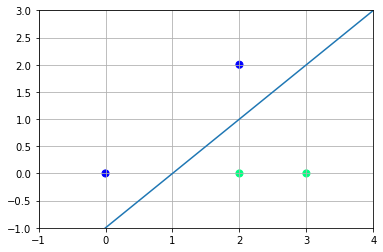

In [51]:
aff_plan(w_opti, b_opti, bornex)
aff_donnees(X, y, bornex, borney, 50)

## 3. SVM à marge souple

In [52]:
def aff_frontiere(X,y,bornex,borney,model):
    aff_donnees(X,y,bornex,borney,50)
    xx, yy = np.meshgrid(np.linspace(bornex[0], bornex[1],50), np.linspace(borney[0], borney[1],50))
    xy = np.concatenate((np.reshape(xx,(xx.shape[0]*xx.shape[1],1)),np.reshape(yy,(yy.shape[0]*yy.shape[1],1))),axis=1)
    P = model.predict(xy)
    aff_donnees(xy,P,bornex,borney,1)

In [53]:
X = np.array([[0, 2, 2, 3, 2.1, 1.5],[0, 2, 0, 0, 2.5, 2.5]]).T
y = np.array([-1, -1, 1, 1, 1, 1]).T
model = svm.SVC(kernel='linear', C=100) 
model.fit(X, y) 
w = model.coef_[0] 
b = model.intercept_[0]

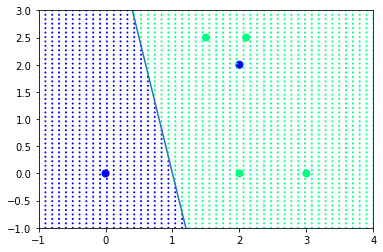

In [54]:
aff_plan(w, b, bornex)
aff_frontiere(X, y, bornex, borney, model)

## 4. SVM avec Kernel

In [55]:
f = np.load('TP6.npz',allow_pickle=True) 
X1=f['arr_0']
y1=f['arr_1']

bornex = (np.min(X1[:,0])- 1, np.max(X1[:,0]+ 1))
borney = (np.min(X1[:,1])- 1, np.max(X1[:,1]+ 1))

### Noyau Gaussien

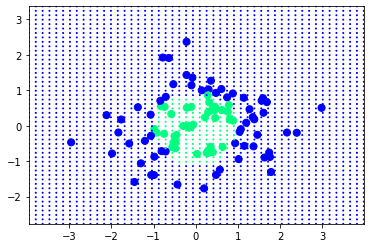

In [56]:
model = svm.SVC(kernel='rbf') 
model.fit(X1, y1) 

aff_frontiere(X1, y1, bornex, borney, model)

### Sur des données linéairement séparables

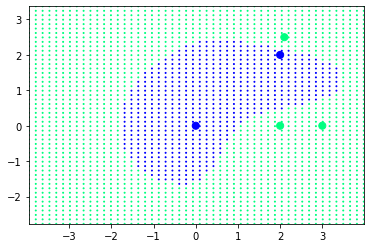

In [63]:
X = np.array([[0, 2, 2, 3, 2.1],[0, 2, 0, 0, 2.5]]).T
y = np.array([-1, -1, 1, 1, 1]).T
model = svm.SVC(kernel='rbf', C=10) 
model.fit(X, y) 

aff_frontiere(X, y, bornex, borney, model)

### Noyau Polynominal

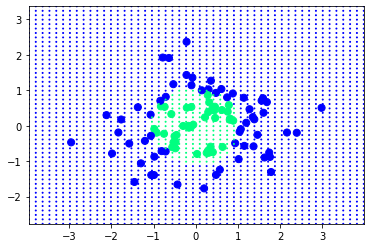

In [59]:

model = svm.SVC(kernel='poly', degree= 2 ) 
model.fit(X1, y1) 

aff_frontiere(X1, y1, bornex, borney, model)